# Project: Wrangling and Analyze Data

In [1]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import os
import requests

## Data Gathering

#### Twitter archive data

In [116]:
# Load twitter_archive data
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


twitter_archive_enhanced.csv is downloaded manualy  and loaded

#### Image prediction data

In [423]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [885]:
# Get response from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [425]:
# Write content into a file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [117]:
# Load file
image_predictions_df = pd.read_csv('./image_predictions/image-predictions.tsv', sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Image prediction file is downloaded using request library.

#### Twitter data

In [118]:
# Read tweet-json.txt line by line into a list of dictionaries and convert to pandas DataFrame
twitter_data_list = []
for line in open('tweet-json.txt', 'r'):
    data = json.loads(line)
    twitter_data_list.append({'tweet_id': data['id_str'],'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],'followers_count': data['user']['followers_count']})
    

twitter_df = pd.DataFrame(twitter_data_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])
twitter_df.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


Lines are extracted from the tweet-json.txt and converted to PandasDataframe

## Assessing Data

> ___Twitter Archive data:___ Visual assessment and programatic assessment is carried out on the twitter archive data.

In [119]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
1443,696744641916489729,NaN,NaN,2016-02-08 17:17:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Klevin. He doesn't want his family bra...,NaN,NaN,NaN,https://vine.co/v/i1wrljBUjAu,10,10,Klevin,None,None,None,None
225,849051919805034497,NaN,NaN,2017-04-04 00:12:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. Kevin doesn't give a single h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849051919...,13,10,Kevin,None,None,None,None
1828,676263575653122048,NaN,NaN,2015-12-14 04:52:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All this pupper wanted to do was go skiing. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676263575...,10,10,None,None,None,pupper,None
201,853760880890318849,NaN,NaN,2017-04-17 00:03:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Alice. I'm told she enjoys car ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853760880...,12,10,Alice,None,None,None,None


In [120]:
# Check information in twitter archive DataFrame
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [121]:
# Check for null values
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [122]:
# Check statistics of twitter archive DataFrame
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [123]:
# Check for duplicates
twitter_archive_df.duplicated().sum()

0

In [124]:
# Check value_counts for rating_denominator
twitter_archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [125]:
# Check for numerators less than 10
twitter_archive_df.query('rating_numerator < 10').rating_numerator.value_counts()

9    158
8    102
7     55
5     37
6     32
3     19
4     17
1      9
2      9
0      2
Name: rating_numerator, dtype: int64

In [126]:
#Check column names
twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [127]:
# Check text column
twitter_archive_df.text[99]

"Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR"

In [128]:
# Check dog names
twitter_archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [129]:
# Check value counts for doggo column
twitter_archive_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

> ___Twitter data:___ 
> Visual assessment and programatic assessment is carried out on the twitter data.

In [130]:
# Check for duplicates
twitter_df.duplicated().sum()

0

In [131]:
# Check twitter information 
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [132]:
# Check twitter statistics
twitter_df.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


> ___Image predictions data:___ 
> Visual assessment and programatic assessment is carried out on image predictions data.

In [133]:
# Check predictions information
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [134]:
# Check image prediction data 
image_predictions_df.sample(3)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1852,840632337062862849,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True
502,675870721063669760,https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg,1,golden_retriever,0.263892,True,Welsh_springer_spaniel,0.184193,True,beagle,0.182241,True


In [135]:
# Check null values in image predictions
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [136]:
# Check for duplicates
image_predictions_df.duplicated().sum()

0

### Quality issues

#### >twitter_archive_df 

1. Erroneus datatype(tweet_id) 

2. Invalid rating_numerators and rating_denominators. Some rating numerators and denominators are less than 10.

3. Unusual dog names in name such as Stu','just', 'life', 'light', 'mad', 'my', 'not', 'old', etc in name column.

4. Nulls represented as 'None' in name column

5. timesatamp and retweeted_status_timestamp should be datetime and not object.

6. Nulls in doggo,floofer,pupper and puppo are represented by 'None' instead of 'NaN'.

7. Data types for retweeted_status_id should be string and not float.

8. Missing data in these columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

#### >twitter_df

1. Count of tweets did not match that of twitter_archive_df. Therefore there are missing tweets data.

#### >image_predictions_df

1. There are missing images data for the tweets.
2. Erroneus datatype(tweet_id)

### Tidiness issues

#### >twitter_archive_df 

1. Separate columns for dog stages


#### >twitter_df

1. twitter_df table is separate from the main table which is twitter_archive_df


#### >image_predictions_df

1.  Image_predictions_df is separated from the main table twitter_archive_df

In [137]:
# Check twitter information
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [138]:
# Check image prediction informtion
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Cleaning Data

In [139]:
# Make copies of original pieces of data
archive_clean_df = twitter_archive_df.copy()
twitter_clean_df = twitter_df.copy()
image_clean_df = image_predictions_df.copy()

### Quality

#### Define: Datatype of tweet_id in both archive_clean_df and image_clean_df will be changed to string.

#### Code

In [140]:
# Convert datatypes to strings
archive_clean_df.tweet_id = archive_clean_df.tweet_id.astype(str)
image_clean_df.tweet_id = image_clean_df.tweet_id.astype(str)

#### Test

In [141]:
# Check datatype
archive_clean_df.tweet_id.dtype

dtype('O')

In [142]:
# Check datatype
image_clean_df.tweet_id.dtype

dtype('O')

#### Define Unusual dog names will be replced with 'NaN'. Nulls represented as 'None' will be changed to 'No_name'

#### Code

In [143]:
# Replace incorrect names with No_name
archive_clean_df.name = archive_clean_df.name.replace({'None' : np.nan})
name_list = ['Stu','just', 'life', 'light', 'mad', 'my', 'not', 'old', 'one', 'quite', 'space',
            'the','officially', 'this', 'very','infuriating', 'a','unacceptable', 'an','such']
for dog_name in name_list: 
    archive_clean_df.name = archive_clean_df.name.replace({dog_name : 'No_name'})   

#### Test

In [144]:
# Test changes
archive_clean_df.query("name == ['Stu','just', 'life', 'light', 'mad', 'my', 'not', 'old', 'one', 'quite', 'space','the','officially', 'this', 'very','infuriating', 'a','unacceptable', 'an','such']")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [145]:
# Check value_counts for names
archive_clean_df.name.value_counts()

No_name       102
Charlie        12
Lucy           11
Oliver         11
Cooper         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 937, dtype: int64

#### Define: timestamp and retweeted_status_timestamp will be changed to datetime

#### Code

In [146]:
# Convert datatype to timestamp
archive_clean_df.timestamp = pd.to_datetime(archive_clean_df.timestamp) 
archive_clean_df.retweeted_status_timestamp = pd.to_datetime(archive_clean_df.retweeted_status_timestamp)

#### Test

In [147]:
# Test changes 
archive_clean_df.timestamp.dtype

datetime64[ns, UTC]

In [148]:
# Test changes
archive_clean_df.retweeted_status_timestamp.dtype

datetime64[ns, UTC]

#### Define: Nulls in doggo,floofer,pupper and puppo  represented as 'None' will be changed to 'NaN'

#### Code

In [149]:
# Replace nulls with NaN
archive_clean_df.doggo = archive_clean_df.doggo.replace({'None': np.nan})
archive_clean_df.floofer = archive_clean_df.floofer.replace({'None': np.nan})        
archive_clean_df.pupper = archive_clean_df.pupper.replace({'None': np.nan})
archive_clean_df.puppo = archive_clean_df.puppo.replace({'None': np.nan})

#### Test

In [150]:
#archive_clean_df.doggo.value_counts()
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [151]:
# Check value_counts for name
archive_clean_df.name.value_counts()


No_name       102
Charlie        12
Lucy           11
Oliver         11
Cooper         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 937, dtype: int64

In [152]:
archive_clean_df.retweeted_status_id.value_counts()
#archive_clean_df.retweeted_status_id.isnull()
archive_clean_df.shape

(2356, 17)

#### Define: All rows with retweets will be dropped. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls will not be used in the analysis and therefor will be dropped.


#### Code

In [153]:
# Remove rows with retweets
archive_clean_df = archive_clean_df[archive_clean_df.retweeted_status_id.isnull()]
archive_clean_df = archive_clean_df[archive_clean_df.retweeted_status_user_id.isnull()]
archive_clean_df = archive_clean_df[archive_clean_df.retweeted_status_timestamp.isnull()]

In [154]:

# Drop columns not needed for analysis
archive_clean_df.drop(archive_clean_df[['in_reply_to_status_id','in_reply_to_user_id',
                                        'retweeted_status_id','retweeted_status_user_id',
                                        'retweeted_status_timestamp','expanded_urls']], 
                                         axis=1, inplace= True)

#### Test

In [155]:
# Test changes
archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Tidiness

### Define: Dog stage columns will be conbined to form one column

### Code

In [156]:
# Merge dog stage columns
archive_clean_df['dog_stages'] = (archive_clean_df.pupper.replace({np.nan:''})+ 
                                 archive_clean_df.puppo.replace({np.nan:''})+
                                 archive_clean_df.doggo.replace({np.nan: ''})+
                                 archive_clean_df.floofer.replace({np.nan: ''}))


In [157]:
# Replace empty cells with NaN
archive_clean_df['dog_stages'] = archive_clean_df.dog_stages.replace({'': np.nan})
archive_clean_df.drop(archive_clean_df[['doggo','floofer','pupper','puppo']], axis=1, inplace=True)

### Test

In [158]:
# Test changes
archive_clean_df.dog_stages.value_counts()

pupper          224
doggo            75
puppo            24
pupperdoggo      10
floofer           9
puppodoggo        1
doggofloofer      1
Name: dog_stages, dtype: int64

In [159]:
# Pupper ',' between double entries
archive_clean_df.loc[archive_clean_df.dog_stages == 'pupperdoggo', 'dog_stages'] = 'puper, doggo'
archive_clean_df.loc[archive_clean_df.dog_stages == 'puppodoggo', 'dog_stages'] = 'puppo, doggo'
archive_clean_df.loc[archive_clean_df.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [160]:
# Test changes
archive_clean_df.dog_stages.value_counts()

pupper            224
doggo              75
puppo              24
puper, doggo       10
floofer             9
puppo, doggo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

In [161]:
# Test changes
archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

### Define: Merge Tables

### Code

In [162]:
# Merge DataFrames 
merged_df = pd.merge(archive_clean_df, twitter_clean_df, on='tweet_id', how='inner')
merged_df = pd.merge(merged_df, image_clean_df, on='tweet_id', how='inner')

### Test

In [163]:
# Test changes
merged_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8964,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9774,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [164]:
# Test changes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1448 non-null   object             
 7   dog_stages          306 non-null    object             
 8   retweet_count       1994 non-null   int64              
 9   favorite_count      1994 non-null   int64              
 10  followers_count     1994 non-null   int64              
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [165]:
# Save merged data
merged_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data

In [166]:
# Check sample data
df = pd.read_csv('twitter_archive_master.csv')
df.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1927,667176164155375616,2015-11-19 03:02:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",These are strange dogs. All have toupees. Long...,4,10,NaN,NaN,484,640,...,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True


#### 1. Occurrences of dog stages?

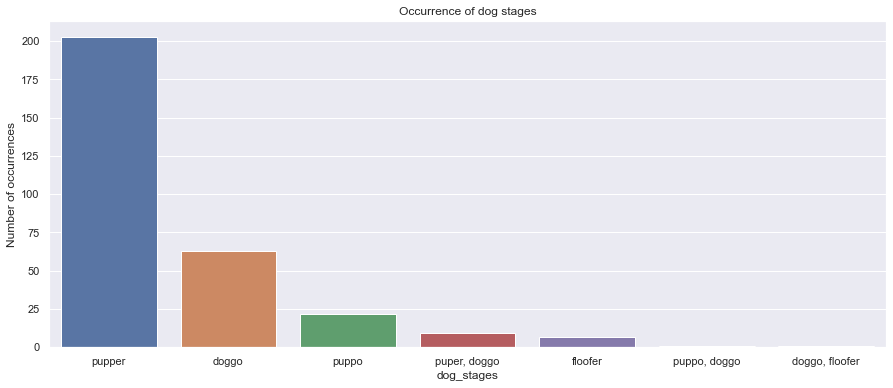

In [167]:
# Create barplot for number of occurrence for dog stages
data =sns.barplot(x=df.dog_stages.value_counts().index,y=df.dog_stages.value_counts().values)
sns.set(rc = {'figure.figsize':(10,6)})
data.set_xlabel('dog_stages')
data.set_ylabel('Number of occurrences')
data.set_title('Occurrence of dog stages');

Largest number of the dogs were categorized in the Pupper stage.  

#### 2. Most used rating numerator?

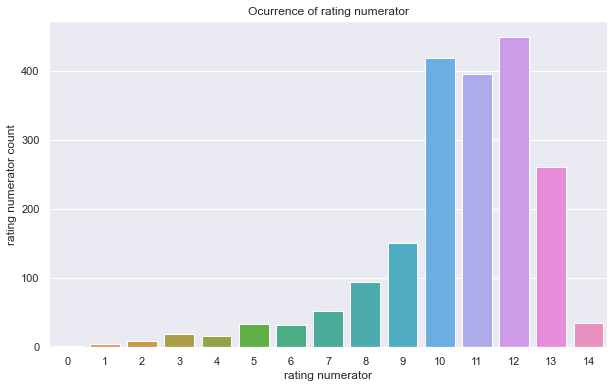

In [168]:
# Create barplot for occurrence of rating numerator
data = sns.barplot(x = df.rating_numerator.value_counts()[0:15].index, y = df.rating_numerator.value_counts()[0:15].values)
sns.set(rc = {'figure.figsize':(15,6)})
data.set_xlabel('rating numerator')
data.set_ylabel('rating numerator count')
data.set_title('Ocurrence of rating numerator');

12 has the highest number of occurrences in the rating numerators.

#### 3. Popular dog names?

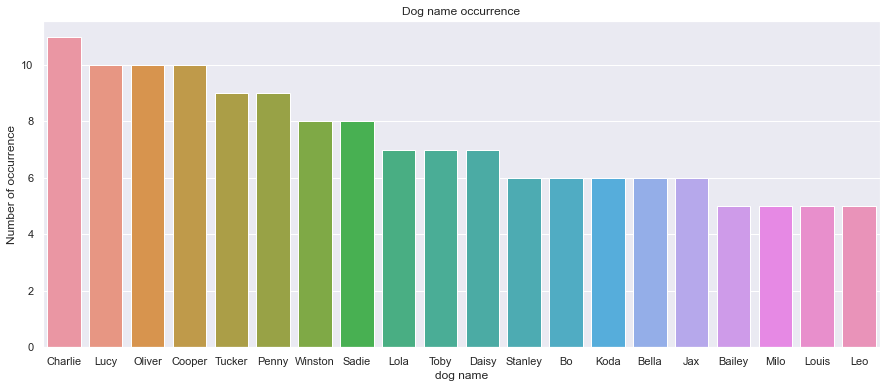

In [169]:
# Create barplot for dog name occurrence
data = sns.barplot(x = df.name.value_counts()[1:21].index, y= df.name.value_counts()[1:21].values);
sns.set(rc = {'figure.figsize':(15,6)})
data.set_xlabel('dog name')
data.set_ylabel('Number of occurrence')
data.set_title('Dog name occurrence');

Large portion of the dogs did not have names. The bar plot shows top twenty names that occurred most, Charlie happens to have the highest number of occurrences.

#### 4. Correlation between retweet count and favorite count?

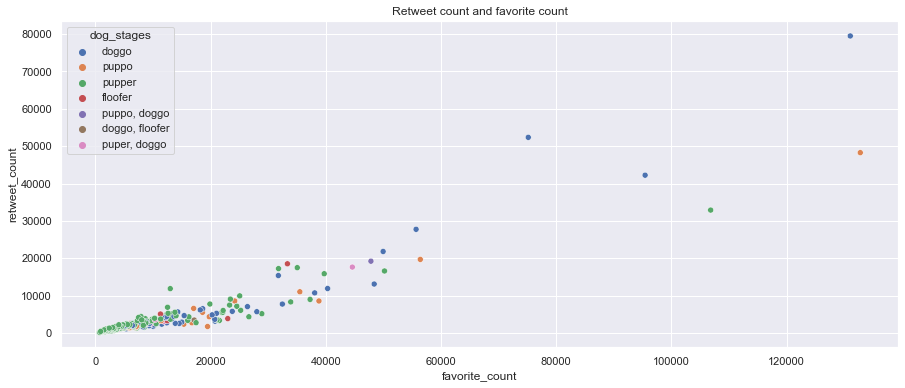

In [170]:
# Create scatterplot for favorites and retweets
data=sns.scatterplot(x=df.favorite_count, y=df.retweet_count, hue=df.dog_stages)
data.set_title('Retweet count and favorite count');

In [171]:
np.corrcoef(df.favorite_count, df.retweet_count)[0,1]

0.9129466274183703

There is a positive correlation between favorite count and retweet count.Also doggo has the highest retweet count recorded